# Exercise for the 3rd course week

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


In [1]:
import names
import random
import csv
import matplotlib.pyplot as plt

# Exercise 1
genders = ['female', 'male']
course_names = ['Maths', 'English', 'Danish', 'Biology','Chemisty','Geology','Religion']
classrooms = ['A101','A102','A103','A104','A105','A106','A107','A108','A109','A110','A111','A112','A113']

class Course():
    def __init__(self, name, classroom, teacher, ETCS, grade = None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ETCS = ETCS
        self.grade = grade        
    
    def __str__(self):
        output = f'Name: {self.name}, Classroom: {self.classroom}, Teacher: {self.teacher}, ETCS: {self.ETCS}'
        if self.grade != None:
            output += f', Grade: {self.grade}'
        return output

class DataSheet():
    def __init__(self, courses=[]):
        self.courses = courses 
    
    def __str__(self):
        output = ""
        for cIndex in range(0, len(self.courses)):
            output += str(self.courses[cIndex])
            if cIndex < (len(self.courses)-1):
                output += "\n"
        return output

    def get_grades_as_list(self):
        grades = []
        for course in self.courses:
            if course.grade != None:
                grades.append(course.grade)
        return grades

class Student():
    def __init__(self, name, gender, image_url, dataSheet):
        self.name = name
        self.gender = gender
        self.image_url = image_url
        self.dataSheet = dataSheet

    def __str__(self):
        return f'Name: {self.name}, gender: {self.gender}, image_url: {self.image_url}.\nDataSheet:\n{self.dataSheet}'

    def short(self):
        return f'Name: {self.name}, gender: {self.gender}, image_url: {self.image_url}.'

    def get_avg_grade(self):
        avg = 0
        grades = self.dataSheet.get_grades_as_list()
        for grade in grades:
            if(grade != ""):
                avg += (grade / len(grades))
        return avg

    def get_etcs_progression(self):
        prog = 0
        for course in self.dataSheet.courses:
            prog += course.ETCS
        return ((prog/150)*100)

    def get_courses_taken(self):
        return self.dataSheet.courses


def write_students_to_csv(students, output_file):
    with open(output_file, "w", newline='\n') as file:
        fieldnames = ['stud_name','stud_gender','course_name','teacher','etcs','classroom','grade','image_url']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for student in students:
            for course in student.dataSheet.courses:
                writer.writerow({'stud_name':student.name,'stud_gender':student.gender,'course_name':course.name,'teacher':course.teacher,'etcs':course.ETCS,'classroom':course.classroom,'grade':course.grade,'image_url':student.image_url})

def generate_student(n):
    students = []
    for index in range(0, n):
        gender = random.choice(genders)
        courses =  []
        minCourse = min(random.randint(0, len(course_names))+1,len(course_names))
        for cIndex in range(0, minCourse):
            if random.randint(0,11) < 8:
                course = Course(course_names[cIndex],random.choice(classrooms),names.get_full_name(),10, random.randint(0,101))
                courses.append(course)
            else:
                course = Course(course_names[cIndex],random.choice(classrooms),names.get_full_name(),10)
                courses.append(course)
        dataSheet = DataSheet(courses)
        image_url = f'img%d.png' % index
        student = Student(names.get_full_name(gender),gender,image_url, dataSheet)
        students.append(student)
    return students

def generate_students_to_csv(output_file, n = 1):
    students = generate_student(n)
    write_students_to_csv(students, output_file)

def load_students_from_csv(input_file):
    students = []
    with open(input_file, "r") as file:
        reader = csv.DictReader(file)
        last_used_name = ""
        last_used_gender = ""
        last_used_image_url = ""
        temp_courses = []
        for row in reader:
            stud_name = row['stud_name']
            stud_gender = row['stud_gender']
            image_url = row['image_url']
            # course
            course_name = row['course_name']
            teacher = row['teacher']
            ects = row['etcs']
            classroom = row['classroom']
            grade = row['grade']
            if grade == '':
                current_course = Course(course_name,classroom,teacher,int(ects))
            else:
                current_course = Course(course_name,classroom,teacher,int(ects),int(grade))

            if stud_name == last_used_name or last_used_name == "":
                temp_courses.append(current_course)
            else:
                dataSheet = DataSheet(temp_courses)
                students.append(Student(last_used_name,last_used_gender,last_used_image_url,dataSheet))   
                temp_courses = []
                temp_courses.append(current_course)
            last_used_name = stud_name
            last_used_gender = stud_gender
            last_used_image_url = image_url
        dataSheet = DataSheet(temp_courses)
        students.append(Student(last_used_name,last_used_gender,last_used_image_url,dataSheet))   
    return students

def sort_students_by_avg_grades(students):
    sorted_list = sorted(students, key=lambda student: student.get_avg_grade(), reverse=True)
    return sorted_list

def bar_plot_student_grades(students):
    # Note that we are only taking the first name in the following list comprehension
    #  as to make the name more visible in the plot
    names = [student.name.split(" ")[0] for student in sorted_students]
    grades = [student.get_avg_grade() for student in sorted_students]
    plt.bar(names,grades, width=0.2, align='center')
    plt.title("Student Grades", fontsize=12)
    plt.xlabel("Names", fontsize=8)
    plt.ylabel("Average Grades", fontsize=8)
    plt.show()
    
def bar_plot_student_progression(students):
    categories = [x*10 for x in range(0,11)]
    hits = [0 for x in range(0,11)]
    for student in students:
        prog = student.get_etcs_progression()
        catIndex = int(abs(prog / 10))
        hits[catIndex] += 1
    plt.bar(categories, hits, width=5, align='center')
    plt.axis([0, max(categories), 0, max(hits)+5])
    plt.xticks(categories)
    plt.title("Student Progression", fontsize=12)
    plt.xlabel("Categories", fontsize=8)
    plt.ylabel("# Students", fontsize=8)
    plt.show()

############
# Exercise 2
class NotEnoughStudentsException(ValueError):
    def __init__(self, *args, **kwargs):
        ValueError.__init__(self, *args, **kwargs)

    def write_to_log(self, output_file="error.txt", append=True):
        opr = 'a' if append== True else 'w'
        with open(output_file, opr) as file:
            file.write(str(self) + "\n")
            print(f'[ERROR] Log written to: %s' % output_file)
            
def top_three_progress(students, allow_completion=False):
    if not len(students) < 3:
        top_three = []
        sorted_students = sorted(students, key=lambda student: student.get_etcs_progression(), reverse=True)
        for index in range(0,3):
            progression = sorted_students[index].get_etcs_progression()
            if not allow_completion and progression == 100:
                pass
            else:
                top_three.append(sorted_students[index])
        return top_three
    else:
        raise NotEnoughStudentsException('There needs to be at least three students, currenly: {}'.format(len(students)))

def write_top_three_to_file(students, output_file):
    try:
        top_three = top_three_progress(students)
        write_students_to_csv(top_three, output_file)
        print(f'Top three students written to: %s' % output_file)
    except NotEnoughStudentsException as exception:
        exception.write_to_log()

############
# Exercise 3
def pie_chart_plot_progression(students):
    categories = [x*10 for x in range(0,11)]
    hits = [0 for x in range(0,11)]
    for student in students:
        prog = student.get_etcs_progression()
        catIndex = int(abs(prog / 10))
        hits[catIndex] += 1
    
    # Get the categories in text with the % at the end or "" if no student hit the category
    proCategories = [f'%s%%' % categories[i] if hits[i] != 0 else '' for i in range(0,len(categories))]
    plt.pie(hits, labels=proCategories, autopct=lambda p:'{:.1f}%({:.0f})'.format(p,(p/100)*sum(hits)) if p != 0 else '', startangle=90)
    plt.title("ETCS Completion")
    plt.show()

def bar_plot_course_taken(students):
    male_c = {x:0 for x in course_names}
    female_c = {x:0 for x in course_names}
    for student in students:
        c_courses = student.get_courses_taken()
        for c in c_courses:
            if(student.gender == 'male'):
                male_c[c.name] += 1
            else:
                female_c[c.name] += 1
    m_v = list(male_c.values())
    f_v = list(female_c.values())
    plt.bar(male_c.keys(),m_v,width=0.5,color='blue',alpha=1.0, align='center')
    plt.tick_params(axis='both', which='major', labelsize=7)
    plt.axis([-1, len(course_names), 0, len(students)])
    plt.bar(female_c.keys(),f_v,width=0.5,color='red',alpha=1.0, align='center', bottom=m_v)
    plt.title("Number of students pr course")
    plt.show()

# if __name__ == '__main__':
#     n = 50
#     testing = 'Exercise 1'
#     testing = 'Exercise 2'
#     testing = 'Exercise 3'
    
#     print(f'[!] Running %s\n[!] With %d random students' % (testing,n))
#     generate_students_to_csv("std.csv", n)
#     students = load_students_from_csv("std.csv")
#     if testing == 'Exercise 1' :
#         sorted_students = sort_students_by_avg_grades(students)
#         bar_plot_student_grades(sorted_students)
#         bar_plot_student_progression(sorted_students)

#     if testing == 'Exercise 2':
#         try:
#             sorted_students = top_three_progress(students)
#             for student in sorted_students:
#                 print(student)
#         except NotEnoughStudentsException as exception:
#             exception.write_to_log()
#         write_top_three_to_file(students, "output.csv")

#     if testing == 'Exercise 3':
#         pie_chart_plot_progression(students)
#         bar_plot_course_taken(students)

    

In [2]:
n = 10  #Number of students to use in testing below
generate_students_to_csv("std.csv", n)
students = load_students_from_csv("std.csv")

[!] Running Exercise 1
[!] With 10 random students


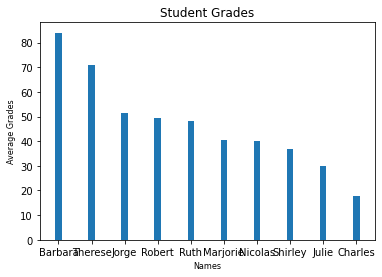

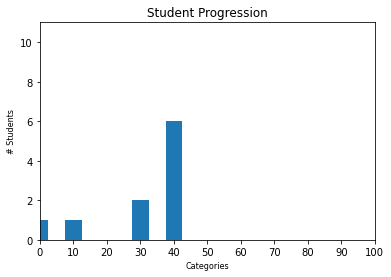

In [3]:
print(f'[!] Running Exercise 1\n[!] With %d random students' % n)
sorted_students = sort_students_by_avg_grades(students)
bar_plot_student_grades(sorted_students)
bar_plot_student_progression(sorted_students)

In [4]:
print(f'[!] Running Exercise 2\n[!] With %d random students' % n)
try:
    sorted_students = top_three_progress(students)
    for student in sorted_students:
        print(student)
except NotEnoughStudentsException as exception:
    exception.write_to_log()
    write_top_three_to_file(students, "output.csv")


[!] Running Exercise 2
[!] With 10 random students
Name: Julie Booth, gender: female, image_url: img3.png.
DataSheet:
Name: Maths, Classroom: A112, Teacher: Samuel Myles, ETCS: 10, Grade: 2
Name: English, Classroom: A105, Teacher: Regina Elsey, ETCS: 10
Name: Danish, Classroom: A109, Teacher: Kim Otano, ETCS: 10
Name: Biology, Classroom: A110, Teacher: Ruth Smith, ETCS: 10, Grade: 18
Name: Chemisty, Classroom: A109, Teacher: Karen Corbett, ETCS: 10
Name: Geology, Classroom: A112, Teacher: Helen Pickles, ETCS: 10, Grade: 14
Name: Religion, Classroom: A102, Teacher: Paul Lazenby, ETCS: 10, Grade: 85
Name: Ruth Peterson, gender: female, image_url: img4.png.
DataSheet:
Name: Maths, Classroom: A107, Teacher: Carlos Coon, ETCS: 10, Grade: 14
Name: English, Classroom: A108, Teacher: Jeffrey Carver, ETCS: 10
Name: Danish, Classroom: A108, Teacher: Maria Caldwell, ETCS: 10
Name: Biology, Classroom: A109, Teacher: Wilma Hudson, ETCS: 10
Name: Chemisty, Classroom: A102, Teacher: Julia Elston, ETC

[!] Running Exercise 
[!] With 10 random students


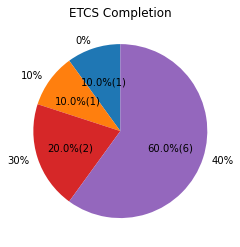

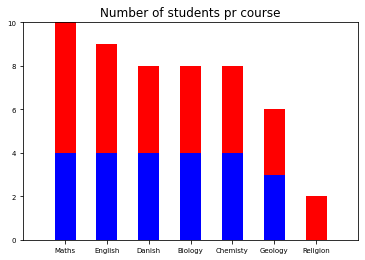

In [5]:
print(f'[!] Running Exercise \n[!] With %d random students' % n)
pie_chart_plot_progression(students)
bar_plot_course_taken(students)